In [1]:
# Importing the modules requried

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Londing the data for csv file

data = pd.read_csv('D:/Project/Data Analysis Project/Analyzing IPL Match Data/IPL_Match_(2008-23)_data.csv')

In [3]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,29-05-2023,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,26-05-2023,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,24-05-2023,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,23-05-2023,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,21-05-2023,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


In [4]:
# Index of Dataset

data.index

RangeIndex(start=0, stop=1024, step=1)

In [5]:
# Columns

data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1024 non-null   int64 
 1   season           1024 non-null   object
 2   city             973 non-null    object
 3   date             1024 non-null   object
 4   team1            1024 non-null   object
 5   team2            1024 non-null   object
 6   toss_winner      1024 non-null   object
 7   toss_decision    1024 non-null   object
 8   result           1024 non-null   object
 9   dl_applied       1024 non-null   int64 
 10  winner           1005 non-null   object
 11  win_by_runs      1024 non-null   int64 
 12  win_by_wickets   1024 non-null   int64 
 13  player_of_match  1019 non-null   object
 14  venue            1024 non-null   object
 15  umpire1          1024 non-null   object
 16  umpire2          1024 non-null   object
 17  umpire3          1021 non-null   

In [7]:
# Number of (Rows, Columns) 

data.shape

(1024, 18)

In [8]:
# Null values by columns(True or False)

data.isnull()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# Count of null values by columns

data.isnull().sum()

id                  0
season              0
city               51
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner             19
win_by_runs         0
win_by_wickets      0
player_of_match     5
venue               0
umpire1             0
umpire2             0
umpire3             3
dtype: int64

In [10]:
# Droping null values

data.dropna(inplace=True)

In [11]:
data.shape

(954, 18)

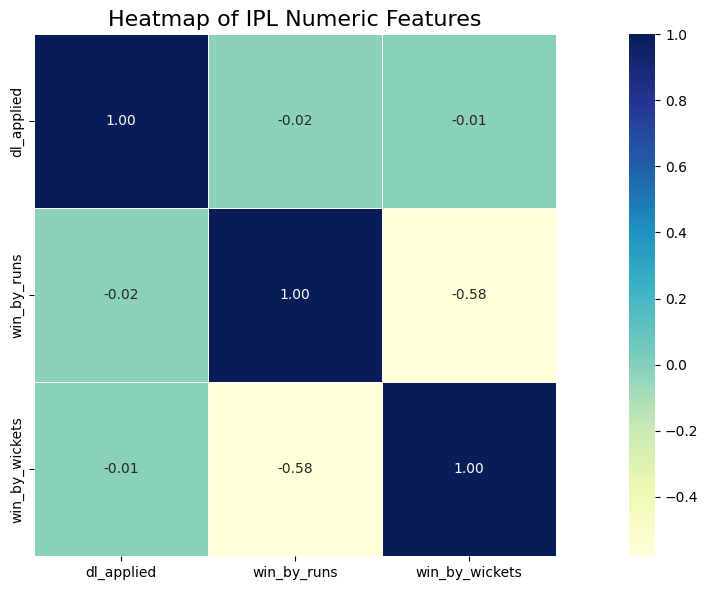

In [12]:
# Heatmap: ['dl_applied', 'win_by_runs', 'win_by_wickets']

# Select only numeric columns
numeric_data = data[['dl_applied', 'win_by_runs', 'win_by_wickets']]

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, square=True)

# Title
plt.title("Heatmap of IPL Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

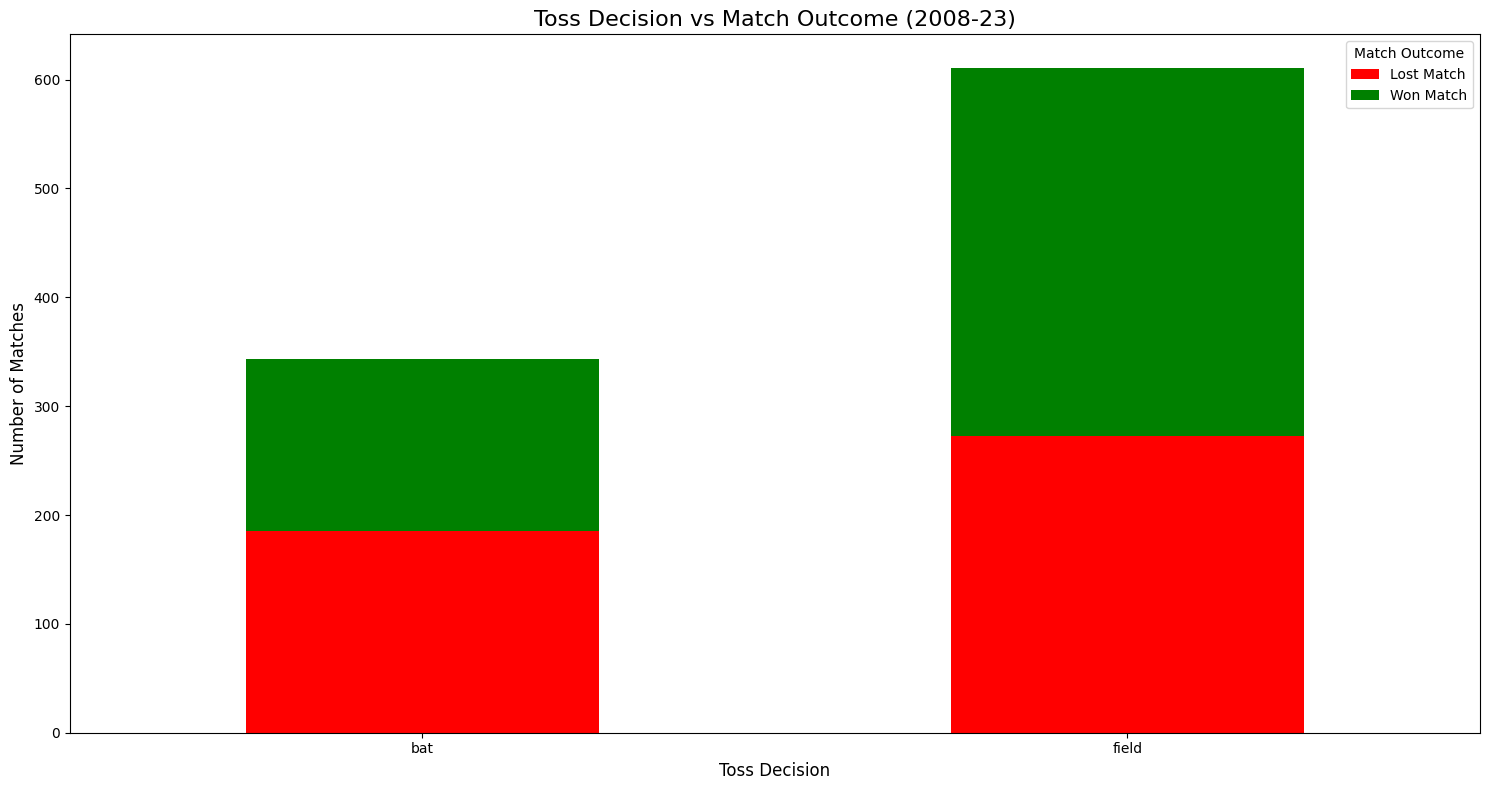

In [13]:
# Barplot: Toss Decision vs Match Outcome (2008-23).

# Create a new column indicating if toss winner also won the match
data['toss_win_and_match_win'] = data['toss_winner'] == data['winner']

# Group by toss decision and match outcome (True/False)
toss_impact = data.groupby('toss_decision')['toss_win_and_match_win'].value_counts().unstack().fillna(0)

# Rename columns for clarity
toss_impact.columns = ['Lost Match', 'Won Match']

# Plotting
toss_impact.plot(kind='bar', stacked=True, figsize=(15, 8), color=['Red', 'green'])

plt.title("Toss Decision vs Match Outcome (2008-23)", fontsize=16)
plt.xlabel("Toss Decision", fontsize=12)
plt.ylabel("Number of Matches", fontsize=12)
plt.xticks(rotation=0)

plt.legend(title="Match Outcome", loc="upper right")
plt.tight_layout()
plt.show()


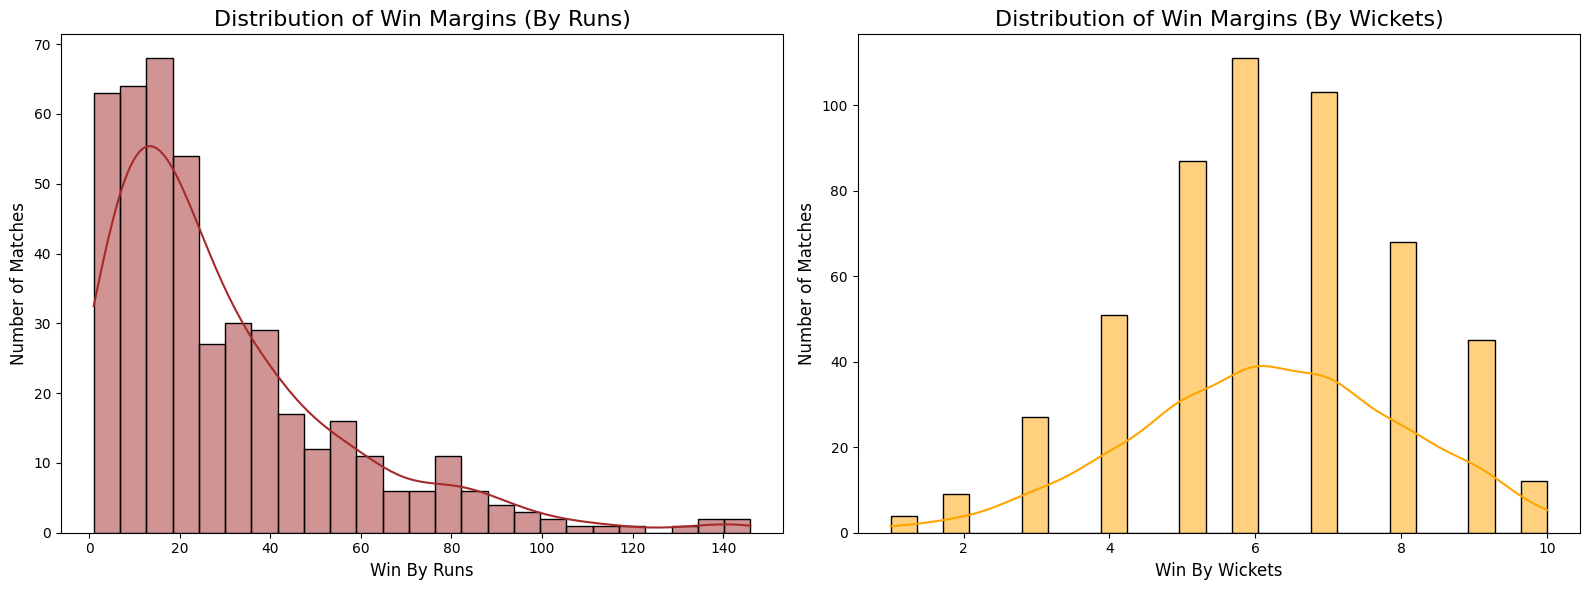

In [14]:
# Histplot: Distribution of win_by_runs and win_by_wickets

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution of win_by_runs (Defending teams)
sns.histplot(data[data['win_by_runs'] > 0]['win_by_runs'], bins=25, kde=True, ax=axes[0], color='brown')
axes[0].set_title("Distribution of Win Margins (By Runs)", fontsize=16)
axes[0].set_xlabel("Win By Runs", fontsize=12)
axes[0].set_ylabel("Number of Matches", fontsize=12)

# Plot 2: Distribution of win_by_wickets (Chasing teams)
sns.histplot(data[data['win_by_wickets'] > 0]['win_by_wickets'], bins=25, kde=True, ax=axes[1], color='orange')
axes[1].set_title("Distribution of Win Margins (By Wickets)", fontsize=16)
axes[1].set_xlabel("Win By Wickets", fontsize=12)
axes[1].set_ylabel("Number of Matches", fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_10356\1659154523.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=team_wins.values, y=team_wins.index, palette="viridis")


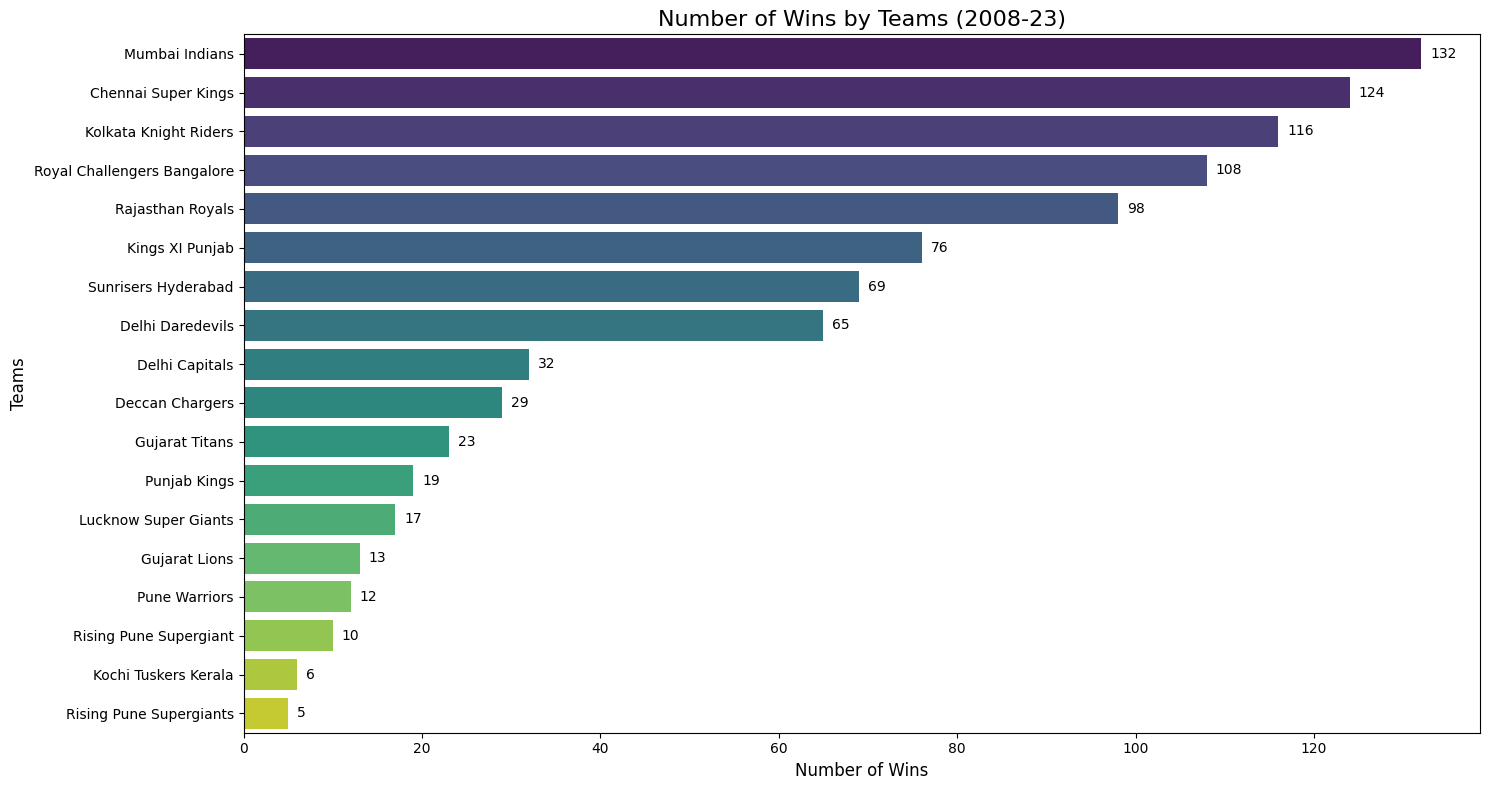

In [15]:
# Barplot: Number of Wins by Teams (2008-23)


# Count number of wins per team in decending order
team_wins = data['winner'].value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=team_wins.values, y=team_wins.index, palette="viridis")

plt.title("Number of Wins by Teams (2008-23)", fontsize=16)
plt.xlabel("Number of Wins", fontsize=12)
plt.ylabel("Teams", fontsize=12)

# Add value labels on each bar
for i, value in enumerate(team_wins.values):
    ax.text(value + 1, i, str(value), va='center')
    
plt.tight_layout()
plt.show()


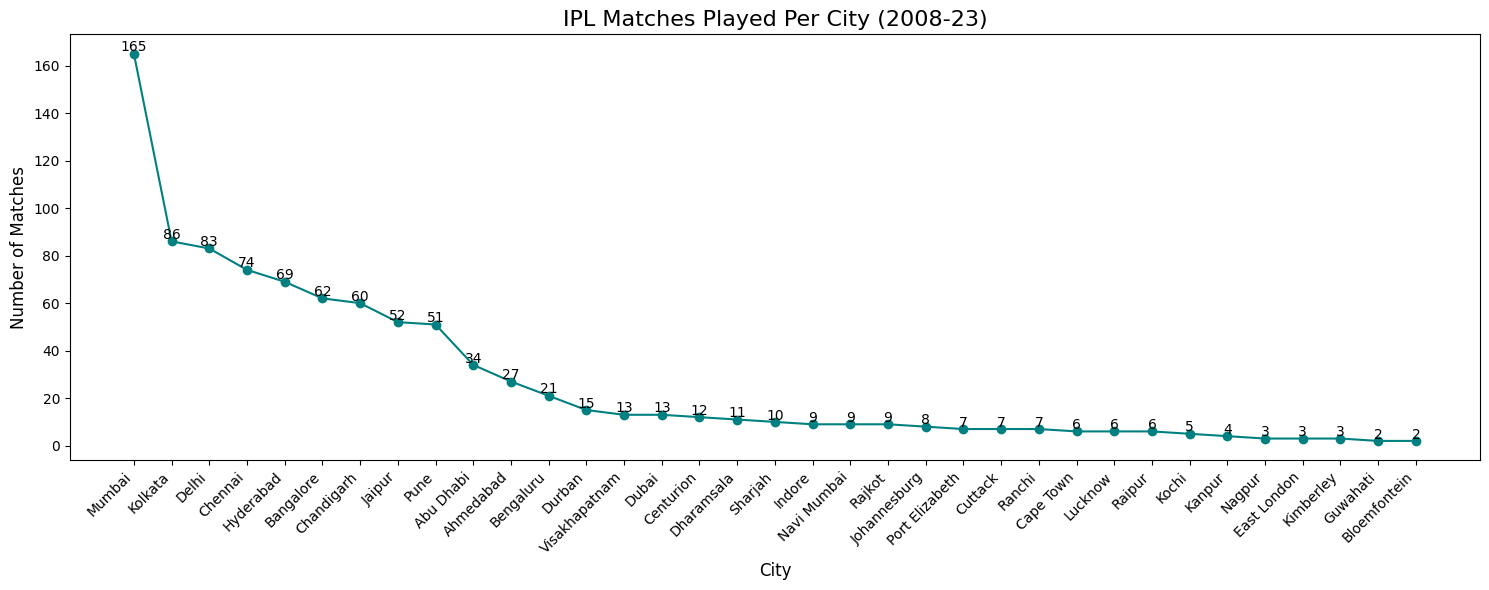

In [16]:
# Countplot: IPL Matches Played Per City (2008-23)

# Count number of matches per city (excluding NaNs)
city_counts = data['city'].value_counts()

# Plotting line graph
plt.figure(figsize=(15, 6))
plt.plot(city_counts.index, city_counts.values, marker='o', linestyle='-', color='teal')

# Add data labels to each point
for i, value in enumerate(city_counts.values):
    plt.text(i, value + 1, str(int(value)), ha='center', fontsize=10)

# Formatting
plt.title("IPL Matches Played Per City (2008-23)", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Matches", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_10356\3654862789.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_players.values, y=top_players.index, palette="magma", alpha=0.9)


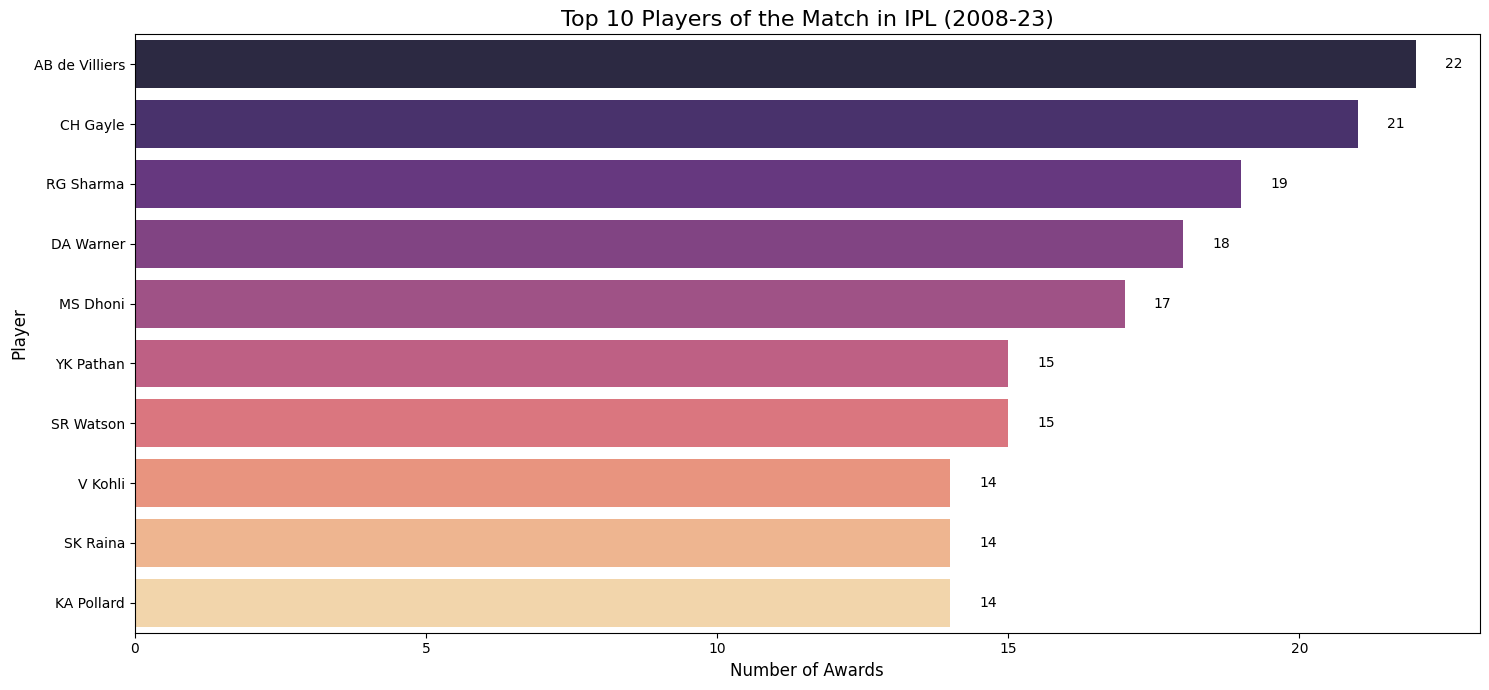

In [17]:
# Barplot: Top 10 Players of the Match in IPL (2008-23)

# Count Player of the Match awards
top_players = data['player_of_match'].value_counts().head(10)

# Plotting
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=top_players.values, y=top_players.index, palette="magma", alpha=0.9)

# Add count labels
for i, value in enumerate(top_players.values):
    plt.text(value + 0.5, i, str(int(value)), va='center')

# Titles and labels
plt.title("Top 10 Players of the Match in IPL (2008-23)", fontsize=16)
plt.xlabel("Number of Awards", fontsize=12)
plt.ylabel("Player", fontsize=12)
plt.tight_layout()
plt.show()

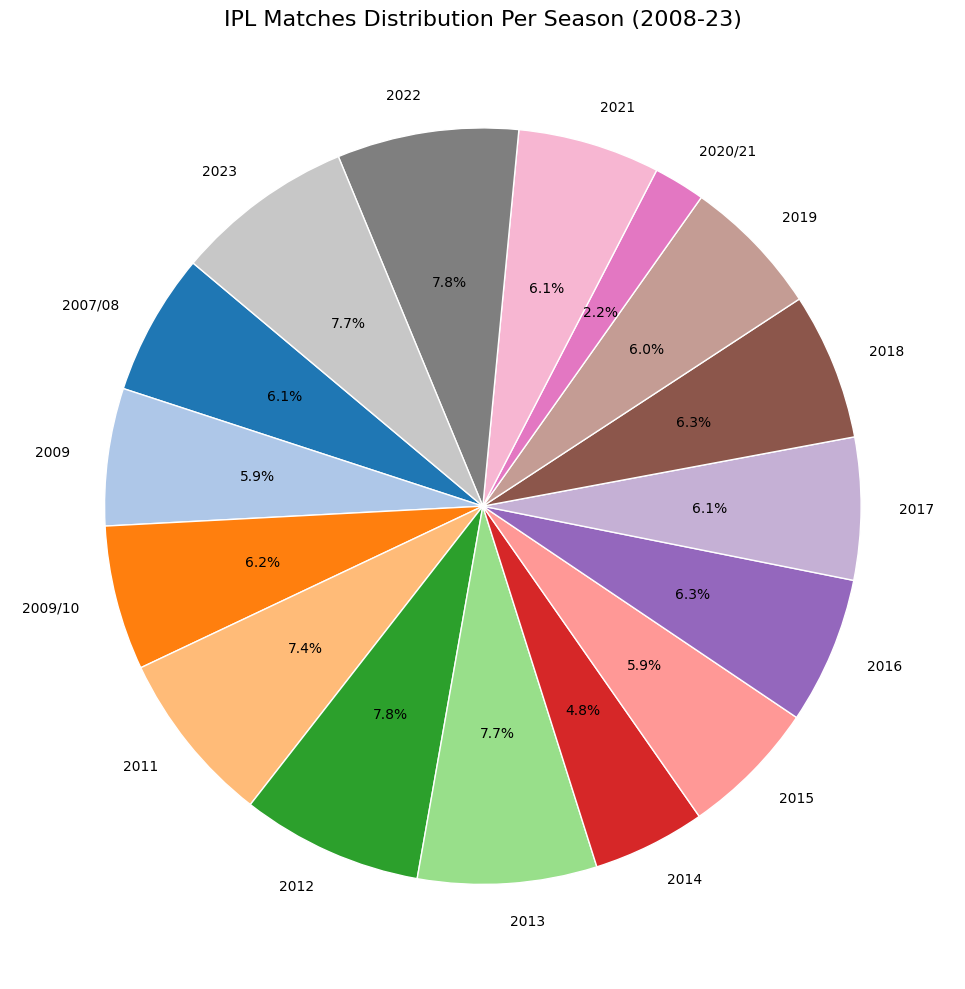

In [18]:
# Pie: IPL Matches Distribution Per Season (2008-23)

# Count matches per season
season_counts = data['season'].value_counts().sort_index()

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors, wedgeprops={'edgecolor': 'white'})

# Title
plt.title("IPL Matches Distribution Per Season (2008-23)", fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
# Model

# Step 1: Drop unnecessary columns
data.drop(columns=['id', 'umpire1', 'umpire2', 'umpire3', 'player_of_match', 'win_by_runs', 'win_by_wickets'], inplace=True)

# Step 2: Drop rows with missing values
data.dropna(subset=['winner', 'team1', 'team2', 'toss_winner', 'venue', 'city'], inplace=True)

# Step 3: Convert 'date' to datetime and extract date parts
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y', errors='coerce')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.drop(columns=['date'], inplace=True)

# Step 4: Encode categorical features
label_cols = ['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'venue', 'winner']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Step 5: Define features and target
X = data.drop(columns=['winner'])  # input features
y = data['winner']                 # target: winning team

# Step 6: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output results
print(f"✅ Model Accuracy: {accuracy:.2f}")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.64

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.81        22
           1       0.75      0.50      0.60         6
           2       0.50      0.33      0.40         3
           3       0.44      0.54      0.48        13
           4       1.00      0.33      0.50         3
           5       0.57      1.00      0.73         4
           6       0.33      0.40      0.36        10
           7       0.00      0.00      0.00         0
           8       0.85      0.74      0.79        23
           9       1.00      0.50      0.67         4
          10       0.61      0.79      0.69        28
          11       0.00      0.00      0.00         6
          12       0.33      0.33      0.33         3
          13       0.68      0.62      0.65        21
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.73      0.

C:\Users\shash\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\shash\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\shash\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [20]:
# Evaluate model performance

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error (RMSE): 4.057182887705852
R² Score: 0.4587333091770457
